In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Desktop/Continuous MPS/MatrixProductBP.jl`


In [2]:
using Revise
using TensorTrains, TensorCast, Tullio, Random, IterTools, Plots, JLD2
using MatrixProductBP
include("../fourier_tensor_train.jl")
;

In [3]:
tail = 1
head = 1
time = 1
filename = "m_$tail-$head fourier.jld2"
# filename = "m_in fourier.jld2"
data = load(filename)

# Py_basis = data["conv_μ_notj"]
Py_basis = data["conv_μ"]
# Py_basis = data["μ_fourier"]

TensorTrain{ComplexF64, 4, OffsetArray{ComplexF64, 4, Array{ComplexF64, 4}}, LogarithmicNumbers.LogFloat64}(OffsetArray{ComplexF64, 4, Array{ComplexF64, 4}}[[-1.891450484742206e-5 + 1.1080109511783084e-5im 2.519813601766685e-5 - 1.9384128096602088e-5im 4.530547059210173e-6 + 3.1426380371178585e-5im -1.021108679046137e-5 - 4.4901624255110294e-5im;;; 1.8320810655560082e-5 + 1.5793918138406844e-5im -2.923427354400534e-5 - 1.9390584752402196e-5im -1.1178291843603075e-5 + 3.320514636532725e-5im 1.2290122910967839e-5 - 4.930337236127595e-5im;;; 4.322560761094575e-5 + 3.934621140683508e-6im -6.290952317720199e-5 + 2.2047201607569515e-6im -1.7842460977051506e-5 - 1.6241060088868668e-6im 2.5982044727533055e-5 + 2.6878553647334035e-7im;;; … ;;; 4.322560761095696e-5 + 3.934621140561414e-6im -6.290952317719589e-5 + 2.2047201609346607e-6im -1.7842460975749803e-5 - 1.62410600918267e-6im 2.598204472707963e-5 + 2.687855369884807e-7im;;; 2.0871370426806315e-5 - 1.2226440600052609e-5im -2.78050964138707

In [4]:
marg_basis = marginals_fourier(Py_basis|>marginalize,2.0)
Pyt_basis = marg_basis[time]

#36 (generic function with 1 method)

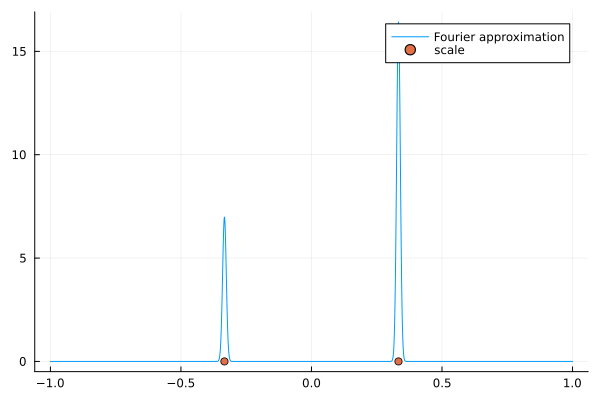

In [6]:
xplot = collect(-1:0.001:1)
yplot = Pyt_basis.(xplot)
plot(xplot, yplot, label="Fourier approximation")
scatter!([-1/3,1/3],[0,0], label="scale")